## (30%) Training a sequence classifier for MNIST data

Let’s train an RNN to classify MNIST images. A convolutional neural network would
be better suited for image classification (see Chapter 13), but this makes for a simple
example that you are already familiar with. We will treat each image as a sequence of
28 rows of 28 pixels each (since each MNIST image is 28 × 28 pixels). 
Your can design your own cell with some numbers of recurrent neurons (a parameter to tune) with a fully connected layer containing 10 neurons (one per class) connected to the output of the last time step. You can begin with a single layer.

In [3]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN, LSTM, GRU 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
nb_classes = 10
img_rows, img_cols = 28, 28

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, nb_classbbbes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)

11493376/11490434 [==============================] - 6s 0us/step

MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)
Y_train: (60000, 10)


In [11]:
# Number of hidden units to use:
nb_units = 50

model = Sequential()

# Recurrent layers supported: SimpleRNN, LSTM, GRU:
model.add(SimpleRNN(nb_units,
                    input_shape=(img_rows, img_cols)))

# To stack multiple RNN layers, all RNN layers except the last one need
# to have "return_sequences=True".  An example of using two RNN layers:
#model.add(SimpleRNN(16,
#                    input_shape=(img_rows, img_cols),
#                    return_sequences=True))
#model.add(SimpleRNN(32))

model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 50)                3950      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 4,460
Trainable params: 4,460
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
epochs = 20

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=2)

Epoch 1/20
 - 3s - loss: 0.8396 - acc: 0.7284
Epoch 2/20
 - 3s - loss: 0.3607 - acc: 0.8938
Epoch 3/20
 - 3s - loss: 0.2787 - acc: 0.9186
Epoch 4/20
 - 3s - loss: 0.2378 - acc: 0.9302
Epoch 5/20
 - 3s - loss: 0.2048 - acc: 0.9409
Epoch 6/20
 - 3s - loss: 0.1877 - acc: 0.9458
Epoch 7/20
 - 3s - loss: 0.1735 - acc: 0.9489
Epoch 8/20
 - 3s - loss: 0.1623 - acc: 0.9533
Epoch 9/20
 - 3s - loss: 0.1586 - acc: 0.9543
Epoch 10/20
 - 3s - loss: 0.1468 - acc: 0.9580
Epoch 11/20
 - 3s - loss: 0.1419 - acc: 0.9593
Epoch 12/20
 - 3s - loss: 0.1387 - acc: 0.9600
Epoch 13/20
 - 3s - loss: 0.1322 - acc: 0.9617
Epoch 14/20
 - 3s - loss: 0.1259 - acc: 0.9641
Epoch 15/20
 - 3s - loss: 0.1261 - acc: 0.9637
Epoch 16/20
 - 3s - loss: 0.1222 - acc: 0.9649
Epoch 17/20
 - 3s - loss: 0.1179 - acc: 0.9665
Epoch 18/20
 - 3s - loss: 0.1183 - acc: 0.9661
Epoch 19/20
 - 3s - loss: 0.1104 - acc: 0.9681
Epoch 20/20
 - 3s - loss: 0.1141 - acc: 0.9672


In [13]:
#%%time
scores = model.evaluate(X_test, Y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))

loss: 0.11%
acc: 0.97%


## Can you try Multi-layer RNN? 

In [16]:
# Number of hidden units to use:
nb_units = 50

model = Sequential()

# Recurrent layers supported: SimpleRNN, LSTM, GRU:
model.add(SimpleRNN(nb_units,
                    input_shape=(img_rows, img_cols),return_sequences=True))

# To stack multiple RNN layers, all RNN layers except the last one need
# to have "return_sequences=True".  An example of using two RNN layers:
model.add(SimpleRNN(16,
                   input_shape=(img_rows, img_cols)))

model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 28, 50)            3950      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 16)                1072      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 5,192
Trainable params: 5,192
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
epochs = 20

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=2)

Epoch 1/20
 - 5s - loss: 0.9290 - acc: 0.7204
Epoch 2/20
 - 5s - loss: 0.4113 - acc: 0.8856
Epoch 3/20
 - 5s - loss: 0.3057 - acc: 0.9142
Epoch 4/20
 - 5s - loss: 0.2633 - acc: 0.9262
Epoch 5/20
 - 5s - loss: 0.2313 - acc: 0.9348
Epoch 6/20
 - 5s - loss: 0.2103 - acc: 0.9410
Epoch 7/20
 - 5s - loss: 0.1995 - acc: 0.9438
Epoch 8/20
 - 5s - loss: 0.1832 - acc: 0.9489
Epoch 9/20
 - 6s - loss: 0.1686 - acc: 0.9526
Epoch 10/20
 - 5s - loss: 0.1707 - acc: 0.9515
Epoch 11/20
 - 5s - loss: 0.1529 - acc: 0.9565
Epoch 12/20
 - 6s - loss: 0.1460 - acc: 0.9590
Epoch 13/20
 - 5s - loss: 0.1409 - acc: 0.9594
Epoch 14/20
 - 5s - loss: 0.1331 - acc: 0.9621
Epoch 15/20
 - 5s - loss: 0.1335 - acc: 0.9621
Epoch 16/20
 - 5s - loss: 0.1270 - acc: 0.9638
Epoch 17/20
 - 5s - loss: 0.1247 - acc: 0.9647
Epoch 18/20
 - 5s - loss: 0.1263 - acc: 0.9639
Epoch 19/20
 - 5s - loss: 0.1179 - acc: 0.9668
Epoch 20/20
 - 5s - loss: 0.1165 - acc: 0.9669


In [18]:
#%%time
scores = model.evaluate(X_test, Y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))

loss: 0.16%
acc: 0.96%


## (30%) Time series prediction by RNN.

Assume time series is $t * sin(t) / 3 + 2 * sin(t*5)$, the problem is to design a RNN model to generate prediction as closer to the original one. You may sample randomly of 20 consecutive values from the time series, and apply your model to generate 20 predicted values to see how closer of your predict values and the original one. 

## You can also try your model with any other new initial  sequence of values to generate more creative new time series. (music generations)

## (10%) Try LSTM cell to classify MNIST data and compare with previous results. 

## (15%) Words embeddings from data set (http://mattmahoney.net/dc/text8.zip) and plot them. For example, if the model is told that “I drink milk” is a valid sentence, and if it knows that “milk” is close to “water” but far from “shoes,”

## (15%) Embedded Reber Grammars

Embedded Reber grammars were used by Hochreiter and Schmidhuber in their paper about LSTMs. They are artificial grammars that produce strings such as
“BPBTSXXVPSEPE.” Check out Jenny Orr’s nice introduction to this topic.
Choose a particular embedded Reber grammar (such as the one represented on Jenny Orr’s page), then train an RNN to identify whether a string respects that
grammar or not. You will first need to write a function capable of generating a
training batch containing about 50% strings that respect the grammar, and 50%
that don’t.

In [19]:
from __future__ import division, print_function, absolute_import

In [20]:
import tensorflow as tf

import time

import numpy as np

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
default_reber_grammar=[
    [("B",1)],  #(state 0) =B=> (state 1)
    [("T", 2),("P", 3)],  # (state 1) =T=> (state 2) or =P=> (state 3)
    [("X", 5), ("S", 2)], # (state 2) =X=> (state 5) or =S=> (state 2)
    [("T", 3), ("V", 4)], # (state 3) =T=> (state 3) or =V=> (state 4)
    [("V", 6), ("P", 5)], # (state 4) =V=> (state 6) or =P=> (state 5)
    [("X",3), ("S", 6)],  # (state 5) =X=> (state 3) or =S=> (state 6)
    [("E", None)]         # (state 6) =E=> <EOS>
    
]

In [23]:
embedded_reber_grammar=[
    [("B",1)],  #(state 0) =B=> (state 1)
    [("T", 2),("P", 3)],  # (state 1) =T=> (state 2) or =P=> (state 3)
    [(default_reber_grammar,4)], # (state 2) =REBER=> (state 4)
    [(default_reber_grammar,5)], # (state 3) =REBER=> (state 5)
    [("P", 6)], # (state 4) =P=> (state 6)
    [("T",6)],  # (state 5) =T=> (state 3)
    [("E", None)]         # (state 6) =E=> <EOS>
    
]

In [24]:
def generate_valid_string(grammar):
    state = 0
    output = []
    while state is not None:
        char, state = grammar[state][np.random.randint(len(grammar[state]))]
        if isinstance(char, list):  # embedded reber
            char = generate_valid_string(char)
        output.append(char)
    return "".join(output)

In [25]:
def generate_corrupted_string(grammar, chars='BTSXPVE'):
    '''Substitute one character to violate the grammar'''
    good_string = generate_valid_string(grammar)
    idx = np.random.randint(len(good_string))
    good_char = good_string[idx]
    bad_char = np.random.choice(sorted(set(chars)-set(good_char)))
    return good_string[:idx]+bad_char+good_string[idx+1:]

In [26]:
chars='BTSXPVE'
chars_dict = {a:i for i,a in enumerate(chars)}
chars_dict

{'B': 0, 'T': 1, 'S': 2, 'X': 3, 'P': 4, 'V': 5, 'E': 6}

In [27]:
def str2onehot(string, num_steps=12, chars_dict=chars_dict):
    res = np.zeros((num_steps, len(chars_dict)))
    for i in range(min(len(string), num_steps)):
        c = string[i]
        res[i][chars_dict[c]] = 1
    return res

In [28]:
def generate_data(data_size=10000, grammar=embedded_reber_grammar, num_steps=None):
    good = [generate_valid_string(grammar) for _ in range(data_size//2)]
    bad = [generate_corrupted_string(grammar) for _ in range(data_size//2)]
    all_strings = good+bad
    if num_steps is None:
        num_steps = max([len(s) for s in all_strings])
    X = np.array([str2onehot(s) for s in all_strings])
    l = np.array([len(s) for s in all_strings])
    y = np.concatenate((np.ones(len(good)), np.zeros((len(bad))))).reshape(-1, 1)
    idx = np.random.permutation(data_size)
    return X[idx], l[idx], y[idx]

In [29]:
np.random.seed(42)
X_train, seq_lens_train, y_train = generate_data(10000)
X_val, seq_lens_val, y_val = generate_data(5000)
X_train.shape, X_val.shape

((10000, 12, 7), (5000, 12, 7))

In [30]:
num_inputs = len(chars)
num_neurons = 32
num_outputs = 1  # reber or not

In [31]:
graph = tf.Graph()

with graph.as_default():
    X = tf.placeholder(tf.float32, [None, None, num_inputs])
    seq_lens = tf.placeholder(tf.int32, [None])
    y = tf.placeholder(tf.float32, [None, num_outputs])
    
    with tf.name_scope("Model"):
        gru_cell = tf.contrib.rnn.GRUCell(num_neurons)
        outputs, states = tf.nn.dynamic_rnn(gru_cell, X, seq_lens, dtype=tf.float32)
    
    with tf.name_scope("logits"):
        logits = tf.layers.dense(states, num_outputs)
    
    with tf.name_scope("optimization"):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits))

        optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
    
    with tf.name_scope("Evaluation"):
        predictions = tf.cast(tf.greater(logits, 0.), tf.float32, name="predicitons")
        correct = tf.equal(predictions, y)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use keras.layers.dense instead.


In [32]:
def run_session(graph, num_epochs=1000, p_every=1, batch_size=50):
    start = time.time()
    with tf.Session(graph=graph) as sess:
        with tf.device('/gpu'):
            init.run()
            train_accuracies = dict()
            val_accuracies = dict()
            losses = dict()
            avg_loss = 0
            X_batches = np.array_split(X_train, len(X_train)//batch_size)
            l_batches = np.array_split(seq_lens_train, len(seq_lens_train)//batch_size)
            y_batches = np.array_split(y_train, len(y_train)//batch_size)
            avg_loss = 0
            for e in range(num_epochs+1):
                for X_batch,l_batch,y_batch in zip(X_batches, l_batches, y_batches):
                    feed_dict = {X:X_batch, seq_lens:l_batch, y: y_batch.reshape(-1, 1)}
                    _, loss_val = sess.run([optimizer, loss], feed_dict=feed_dict)
                avg_loss += loss_val
                if e%p_every == 0:
                    train_accuracy = accuracy.eval(
                        feed_dict = {X:X_train, seq_lens:seq_lens_train, y: y_train.reshape(-1, 1)})

                    val_accuracy = accuracy.eval(
                                             feed_dict={X:X_val,
                                                        seq_lens:seq_lens_val,
                                                        y:y_val.reshape(-1, 1)})

                    losses[e] = avg_loss/p_every if e>0 else avg_loss
                    train_accuracies[e] = train_accuracy
                    val_accuracies[e] = val_accuracy
                    print("Epoch {0}:\nCross_entropy: {1}\nTrain accuracy: {2}\nval accuracy: {3}".format(
                    e, avg_loss/10 if e>0 else avg_loss, train_accuracy, val_accuracy))
                    print("~"*40)
                    
                    avg_loss = 0
                    
            print("Took: ", time.time()-start)
            saver.save(sess,('./reber'))
        

        fig, ax1 = plt.subplots(figsize=(12,7))
        xticks = sorted(losses.keys())
        data1_valid = [train_accuracies[i] for i in xticks]
        data1_val = [val_accuracies[i] for i in xticks]
        data2 = [losses[i] for i in xticks]

        color = 'tab:blue'
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Accuracy', color=color)
        ax1.plot(xticks, data1_valid, color=color)
        ax1.plot(xticks, data1_val, color='tab:green')
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:red'
        ax2.set_ylabel('Cross-entropy loss', color=color)
        ax2.plot(xticks, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        ax1.legend(['Train. accuracy', 'val. accuracy'], loc='lower center')
        ax2.legend(['Train Cross-entropy loss'], loc='upper left')
        fig.tight_layout()  # other

Epoch 0:
Cross_entropy: 0.6896524429321289
Train accuracy: 0.6467999815940857
val accuracy: 0.6431999802589417
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 1:
Cross_entropy: 0.05670747756958008
Train accuracy: 0.6858000159263611
val accuracy: 0.6952000260353088
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 2:
Cross_entropy: 0.052861183881759644
Train accuracy: 0.6722000241279602
val accuracy: 0.6796000003814697
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 3:
Cross_entropy: 0.05066365599632263
Train accuracy: 0.7184000015258789
val accuracy: 0.7287999987602234
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 4:
Cross_entropy: 0.04927193224430084
Train accuracy: 0.7387999892234802
val accuracy: 0.7447999715805054
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 5:
Cross_entropy: 0.05738606452941895
Train accuracy: 0.7233999967575073
val accuracy: 0.7396000027656555
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Took:  4.812327146530151


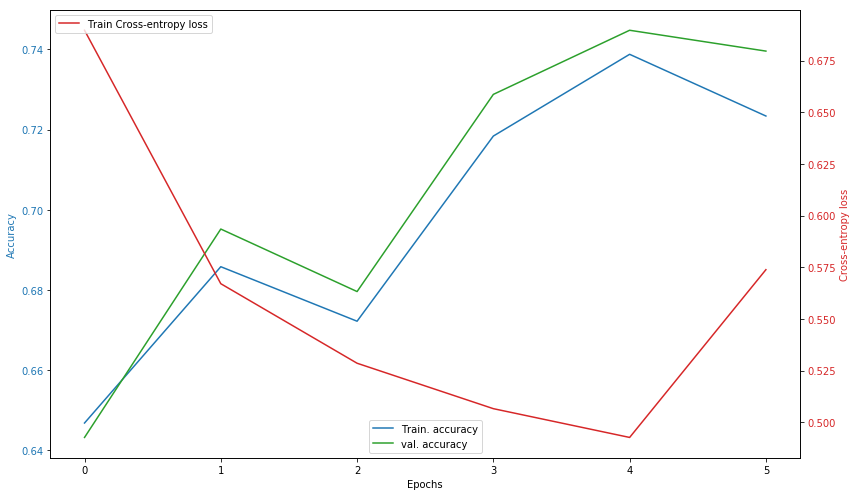

In [34]:
run_session(graph, num_epochs=5, batch_size=75)